In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/train.csv')
data.head()

passenger_id  pclass                                               name  \
0          1216       3                                 Smyth, Miss. Julia   
1           699       3                                    Cacic, Mr. Luka   
2          1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3           449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4           576       2                                    Veal, Mr. James   

      sex   age  sibsp  parch  ticket     fare cabin embarked boat  body  \
0  female   NaN      0      0  335432   7.7333   NaN        Q   13   NaN   
1    male  38.0      0      0  315089   8.6625   NaN        S  NaN   NaN   
2  female  30.0      1      1  345773  24.1500   NaN        S  NaN   NaN   
3  female  54.0      1      3   29105  23.0000   NaN        S    4   NaN   
4    male  40.0      0      0   28221  13.0000   NaN        S  NaN   NaN   

                  home.dest  survived  
0                       NaN         1  
1                   Croatia         0  
2                       NaN         0  
3      Cornwall / Akron, OH         1  
4  Barre, Co Washington, VT         0

In [3]:
data.shape

(850, 15)

In [4]:
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [6]:
data = data.drop(columns=['ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

In [7]:
data.head()

passenger_id  pclass                                               name  \
0          1216       3                                 Smyth, Miss. Julia   
1           699       3                                    Cacic, Mr. Luka   
2          1267       3  Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...   
3           449       2              Hocking, Mrs. Elizabeth (Eliza Needs)   
4           576       2                                    Veal, Mr. James   

      sex   age  sibsp  parch     fare embarked  survived  
0  female   NaN      0      0   7.7333        Q         1  
1    male  38.0      0      0   8.6625        S         0  
2  female  30.0      1      1  24.1500        S         0  
3  female  54.0      1      3  23.0000        S         1  
4    male  40.0      0      0  13.0000        S         0

In [8]:
data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
fare              1
embarked          1
survived          0
dtype: int64

In [9]:
data['age'].fillna(data['age'].median(), inplace=True)

In [10]:
data['fare'].fillna(data['fare'].median(), inplace=True)

In [11]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
survived        0
dtype: int64

In [13]:
duplicate = data.duplicated().sum()
print(duplicate)

0


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data = pd.get_dummies(data, columns=['name','sex', 'embarked'])

In [16]:
print('After Encoding')
data.head()

After Encoding


passenger_id  pclass   age  sibsp  parch     fare  survived  \
0          1216       3  28.0      0      0   7.7333         1   
1           699       3  38.0      0      0   8.6625         0   
2          1267       3  30.0      1      1  24.1500         0   
3           449       2  54.0      1      3  23.0000         1   
4           576       2  40.0      0      0  13.0000         0   

   name_Abbing, Mr. Anthony  name_Abbott, Master. Eugene Joseph  \
0                     False                               False   
1                     False                               False   
2                     False                               False   
3                     False                               False   
4                     False                               False   

   name_Abbott, Mr. Rossmore Edward  ...  \
0                             False  ...   
1                             False  ...   
2                             False  ...   
3                             False  ...   
4                             False  ...   

   name_de Messemaeker, Mrs. Guillaume Joseph (Emma)  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   name_de Pelsmaeker, Mr. Alfons  name_del Carlo, Mr. Sebastiano  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   name_del Carlo, Mrs. Sebastiano (Argenia Genovesi)  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   name_van Billiard, Master. James William  sex_female  sex_male  embarked_C  \
0                                     False        True     False       False   
1                                     False       False      True       False   
2                                     False        True     False       False   
3                                     False        True     False       False   
4                                     False       False      True       False   

   embarked_Q  embarked_S  
0        True       False  
1       False        True  
2       False        True  
3       False        True  
4       False        True  

[5 rows x 861 columns]

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
data.describe()

passenger_id     pclass         age       sibsp       parch  \
count    850.000000  850.00000  850.000000  850.000000  850.000000   
mean     662.816471    2.32000   29.208726    0.522353    0.382353   
std      380.751936    0.83853   12.999023    1.112132    0.879511   
min        1.000000    1.00000    0.166700    0.000000    0.000000   
25%      332.250000    2.00000   22.000000    0.000000    0.000000   
50%      676.500000    3.00000   28.000000    0.000000    0.000000   
75%      992.250000    3.00000   34.875000    1.000000    0.000000   
max     1307.000000    3.00000   80.000000    8.000000    9.000000   

             fare    survived  
count  850.000000  850.000000  
mean    33.989284    0.368235  
std     53.678483    0.482610  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.108300    0.000000  
75%     30.923950    1.000000  
max    512.329200    1.000000

<Axes: xlabel='age'>

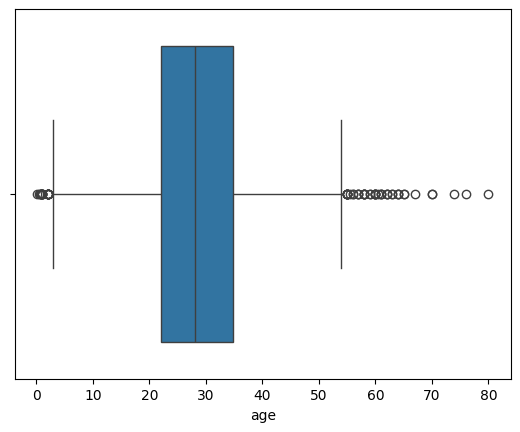

In [19]:
sns.boxplot(x=data['age'])

<Axes: xlabel='fare'>

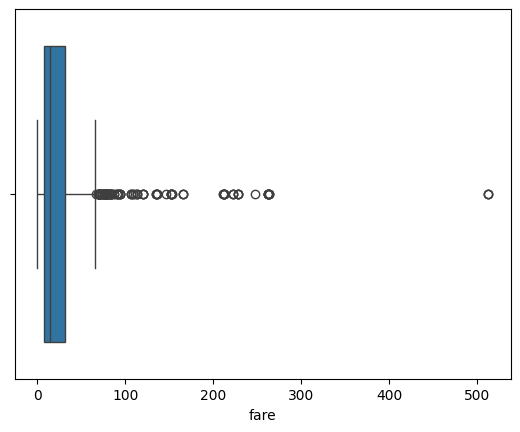

In [20]:
sns.boxplot(x=data['fare'])

In [21]:
q1 = data['fare'].quantile(0.25)
q3 = data['fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [22]:
data1 = data.copy()


In [23]:
data1 = data1[(data1['fare'] >= lower_bound) & (data['fare'] <= upper_bound)]

In [24]:
sns.boxplot(x=data1['fare'])

<Axes: xlabel='fare'>

In [25]:
q1 = data1['age'].quantile(0.25)
q3 = data1['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [26]:
data1  = data1[(data1['age'] >= lower_bound) & (data1['age'] <= upper_bound)]

In [27]:
sns.boxplot(x=data1['age'])

<Axes: xlabel='age'>

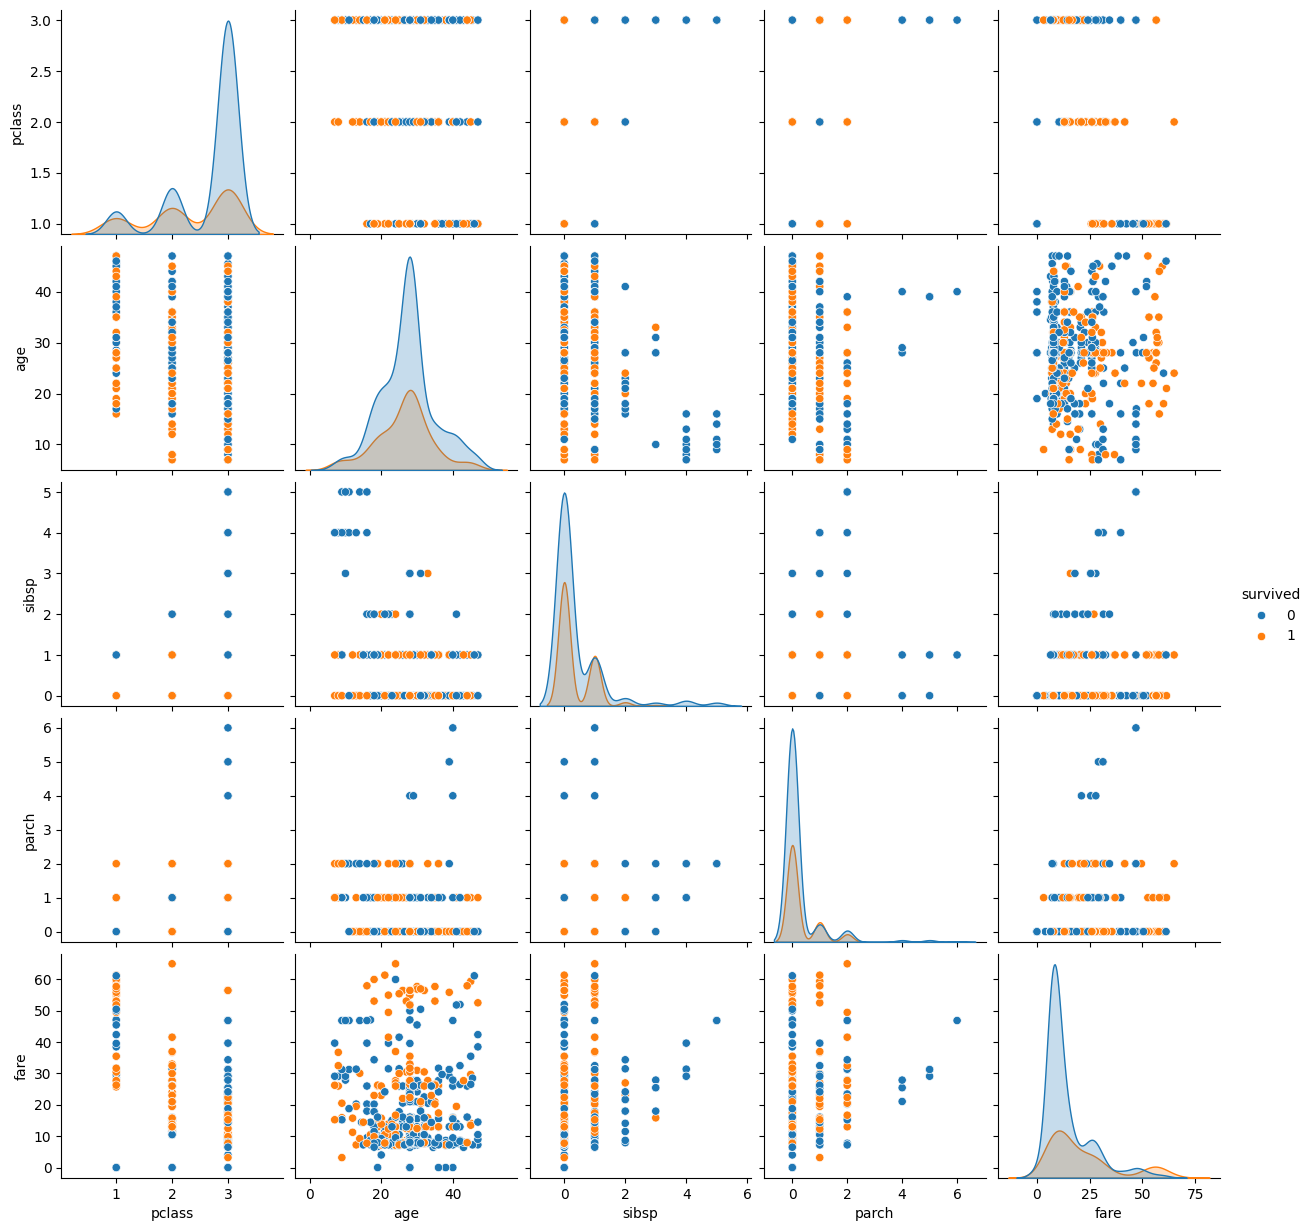

In [28]:
sns.pairplot(data1, vars=['pclass','age', 'sibsp', 'parch', 'fare'], hue='survived')
plt.show()

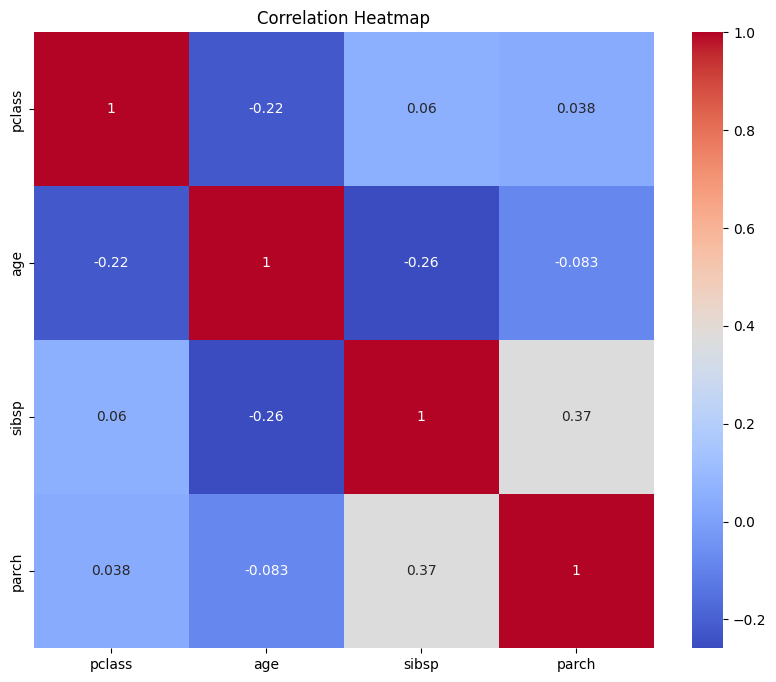

In [30]:
data=['pclass','age','sibsp','parch']
plt.figure(figsize=(10, 8))
corr = data1[data].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', )
plt.title('Correlation Heatmap')
plt.show()

In [32]:
num_col=['pclass','age','sibsp','parch','fare']
from sklearn.decomposition import PCA
variance=data1[num_col].var()
zero_variance_colmns=variance[variance==0].index.tolist()
data1.drop(columns=zero_variance_colmns,inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(data1[num_col])

In [34]:
pca=PCA(n_components=0.95)
df_pca=pca.fit_transform(df_scaled)

In [35]:
# Converting back to DataFrame for easier handling
df_pca = pd.DataFrame(df_pca)

# Display the explained variance ratio to see the importance of each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio by each Principal Component:")
print(explained_variance)
print("\nTransformed Data:")
print(df_pca)

Explained Variance Ratio by each Principal Component:
[0.36881829 0.29922988 0.16550638 0.11459536 0.0518501 ]

Transformed Data:
            0         1         2         3         4
0   -1.052506  0.150704  0.182769 -0.031497  0.123299
1   -1.080389 -0.604031  1.112579 -0.569040  0.176143
2    0.979441  0.682568  1.016479 -0.222551  0.353990
3   -0.330885 -1.698134  0.769131 -0.411986 -0.459425
4   -0.326407 -0.106416  0.026016 -0.047638  0.922788
..        ...       ...       ...       ...       ...
627  3.136178 -3.325508  0.303216 -1.381543  0.879546
628  0.711390  2.536087 -1.050372  1.021182 -0.133307
629 -0.963491  1.036712 -0.944997  0.612320  0.121057
630 -0.444707  1.434973 -0.777543 -0.357782 -0.342125
631  1.019906 -0.218201 -0.905855 -0.431889 -0.156888

[632 rows x 5 columns]
